In [3]:
import seaborn as sns

In [5]:
df = sns.load_dataset('iris')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
import pandas as pd
import numpy as np

In [12]:
df['species_label'],_ = pd.factorize(df['species'])


In [14]:
df.species_label.unique()

array([0, 1, 2], dtype=int64)

In [16]:
df = df.drop(['species'],axis=1)


In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [21]:
y_train.head()

96     1
105    2
66     1
0      0
122    2
Name: species_label, dtype: int64

In [29]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(class_weight='balanced',criterion='gini',max_depth=4,min_samples_leaf=3,
                              min_samples_split=2,presort=True)

In [31]:
dec.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=None, splitter='best')

In [32]:
y_test_pred = dec.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
accuracy_score(y_test,y_test_pred)

1.0

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
a = list(range(1,100,3))
scores = []
for i in a:
    ada = AdaBoostClassifier(base_estimator=dec,n_estimators=i,learning_rate=1.0)
    ada.fit(X_train,y_train)
    y_test_pred1 = ada.predict(X_test)
    curr = accuracy_score(y_test,y_test_pred1)
    scores.append(curr)

In [37]:
scores

[1.0,
 0.96,
 0.96,
 0.98,
 0.98,
 0.96,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.96,
 0.96,
 0.98,
 0.98,
 0.98,
 0.98,
 0.96,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.96,
 0.98]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

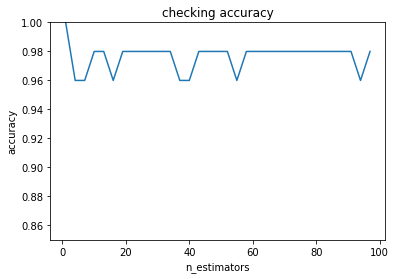

In [41]:
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('checking accuracy')
plt.plot(a,scores)
plt.ylim([0.85,1])
plt.show()

In [42]:
max(scores)

1.0